In [3]:
import pandas as pd

example_sample_submission_data = pd.read_csv('data/example_sample_submission.csv', sep=',')
example_sample_submission_data.head()

,row_id,answered_correctly,group_num
0,0,0.5,0
1,1,0.5,0
2,2,0.5,0
3,3,0.5,0
4,4,0.5,0


In [4]:
example_test_data = pd.read_csv('data/example_test.csv', sep=',')
example_test_data.head()

,row_id,group_num,timestamp,user_id,content_id,content_type_id,task_container_id,prior_question_elapsed_time,prior_question_had_explanation,prior_group_answers_correct,prior_group_responses
0,0,0,0,275030867,5729,0,0,NaN,NaN,[],[]
1,1,0,13309898705,554169193,12010,0,4427,19000.0,True,NaN,NaN
2,2,0,4213672059,1720860329,457,0,240,17000.0,True,NaN,NaN
3,3,0,62798072960,288641214,13262,0,266,23000.0,True,NaN,NaN
4,4,0,10585422061,1728340777,6119,0,162,72400.0,True,NaN,NaN


In [5]:
lectures_data = pd.read_csv('data/lectures.csv', sep=',')
lectures_data.head()

,lecture_id,tag,part,type_of
0,89,159,5,concept
1,100,70,1,concept
2,185,45,6,concept
3,192,79,5,solving question
4,317,156,5,solving question


In [6]:
questions_data = pd.read_csv('data/questions.csv', sep=',')
questions_data.head()

,question_id,bundle_id,correct_answer,part,tags
0,0,0,0,1,51 131 162 38
1,1,1,1,1,131 36 81
2,2,2,0,1,131 101 162 92
3,3,3,0,1,131 149 162 29
4,4,4,3,1,131 5 162 38


# Изучим подробнее train dataset

In [7]:
train_data = pd.read_csv('data/train.csv', sep=',')
train_data.head()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,0,115,5692,0,1.0,3.0,1.0,NaN,NaN
1,1,56943,115,5716,0,2.0,2.0,1.0,37000.0,False
2,2,118363,115,128,0,0.0,0.0,1.0,55000.0,False
3,3,131167,115,7860,0,3.0,0.0,1.0,19000.0,False
4,4,137965,115,7922,0,4.0,1.0,1.0,11000.0,False


In [8]:
train_data = pd.read_csv('data/train.csv', sep=',')
train_data.tail(7)

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
159871,159871,1184475326,3270696,2074,0,281.0,2.0,0.0,24000.0,True
159872,159872,1184683920,3270696,1679,0,282.0,0.0,1.0,22000.0,True
159873,159873,1184683920,3270696,1680,0,282.0,3.0,1.0,22000.0,True
159874,159874,1184683920,3270696,1681,0,282.0,2.0,0.0,22000.0,True
159875,159875,1184881754,3270696,1535,0,283.0,3.0,1.0,28000.0,True
159876,159876,1184881754,3270696,1537,0,283.0,3.0,0.0,28000.0,True
159877,159877,1184881754,3270696,1536,0,NaN,NaN,NaN,NaN,NaN


In [9]:
 train_data.shape

(159878, 10)

In [62]:
#Таким образом, в наших данных содержится информация о 159 878 пользователях, и их описывают 10 признаков.

In [10]:
train_data.memory_usage(deep=True)

Index                                 128
row_id                            1279024
timestamp                         1279024
user_id                           1279024
content_id                        1279024
content_type_id                   1279024
task_container_id                 1279024
user_answer                       1279024
answered_correctly                1279024
prior_question_elapsed_time       1279024
prior_question_had_explanation    5690040
dtype: int64

In [11]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159878 entries, 0 to 159877
Data columns (total 10 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   row_id                          159878 non-null  int64  
 1   timestamp                       159878 non-null  int64  
 2   user_id                         159878 non-null  int64  
 3   content_id                      159878 non-null  int64  
 4   content_type_id                 159878 non-null  int64  
 5   task_container_id               159877 non-null  float64
 6   user_answer                     159877 non-null  float64
 7   answered_correctly              159877 non-null  float64
 8   prior_question_elapsed_time     156279 non-null  float64
 9   prior_question_had_explanation  159299 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 12.2+ MB


In [12]:
#мы видим, что "prior_question_had_explanation" является объектом и занимает много памяти, 
#в то время как он должен быть логическим.

In [14]:
#исправим это
train_data['prior_question_had_explanation'] = train_data['prior_question_had_explanation'].astype('boolean')
train_data.memory_usage(deep=True)

Index                                 128
row_id                            1279024
timestamp                         1279024
user_id                           1279024
content_id                        1279024
content_type_id                   1279024
task_container_id                 1279024
user_answer                       1279024
answered_correctly                1279024
prior_question_elapsed_time       1279024
prior_question_had_explanation     319756
dtype: int64

In [16]:
train_data.head(15) #посмотрим на таблицу

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,0,115,5692,0,1.0,3.0,1.0,NaN,<NA>
1,1,56943,115,5716,0,2.0,2.0,1.0,37000.0,False
2,2,118363,115,128,0,0.0,0.0,1.0,55000.0,False
3,3,131167,115,7860,0,3.0,0.0,1.0,19000.0,False
4,4,137965,115,7922,0,4.0,1.0,1.0,11000.0,False
5,5,157063,115,156,0,5.0,2.0,1.0,5000.0,False
6,6,176092,115,51,0,6.0,0.0,1.0,17000.0,False
7,7,194190,115,50,0,7.0,3.0,1.0,17000.0,False
8,8,212463,115,7896,0,8.0,2.0,1.0,16000.0,False
9,9,230983,115,7863,0,9.0,0.0,1.0,16000.0,False


In [17]:
#Content_type_id = False означает, что был задан вопрос. True означает, что пользователь смотрел лекцию.

In [22]:
print(f'У нас {train_data.user_id.nunique()} уникальных пользователей в train dataset')

У нас 579 уникальных пользователей в train dataset


In [52]:
print('Часть пропущенных значений для каждого столбца')
print(train_data.isnull().sum() / len(train_data))

Часть пропущенных значений для каждого столбца
row_id                            0.000000
timestamp                         0.000000
user_id                           0.000000
content_id                        0.000000
content_type_id                   0.000000
task_container_id                 0.000006
user_answer                       0.000006
answered_correctly                0.000006
prior_question_elapsed_time       0.022511
prior_question_had_explanation    0.003622
ts_bin                            0.000000
dtype: float64


In [18]:
train_data.content_type_id.value_counts()

0    156858
1      3020
Name: content_type_id, dtype: int64

In [20]:
#Content_id — это код взаимодействия с пользователем. По сути, это вопросы, если content_type — вопрос 
#(question_id: внешний ключ для столбца train/test content_id, когда тип контента — вопрос).

In [23]:
print(f'У нас {train_data.content_id.nunique()} content ids в нашем train set, из которых {train_data[train_data.content_type_id == False].content_id.nunique()} - вопросы.')

У нас 11989 content ids в нашем train set, из которых 11770 - вопросы.


In [27]:
print(f'У нас есть {train_data.task_container_id.nunique()} никальных Пакетов вопросов или лекций.')

У нас есть 5631 никальных Пакетов вопросов или лекций.


In [28]:
train_data.user_answer.value_counts()

 0.0    44687
 1.0    42269
 3.0    41587
 2.0    28314
-1.0     3020
Name: user_answer, dtype: int64

In [29]:
#Кажется, что вопросы подразумевают множественность выбора (ответы 0-3). Как упоминалось в описании данных, 
#-1 на самом деле означает отсутствие ответа (поскольку взаимодействие было лекцией, а не вопросом).

In [35]:
print(f'Из {train_data.user_id.nunique()} пользователей в train у нас {train_data[train_data.timestamp == 0].user_id.nunique()} пользователей с нулевой строкой timestamp.')

Из 579 пользователей в train у нас 579 пользователей с нулевой строкой timestamp.


In [34]:
#timestamp: (int64) время в миллисекундах между этим взаимодействием с пользователем и первым завершением события 
#от этого пользователя.

In [37]:
correct = train_data[train_data.answered_correctly != -1].answered_correctly.value_counts(ascending=True)

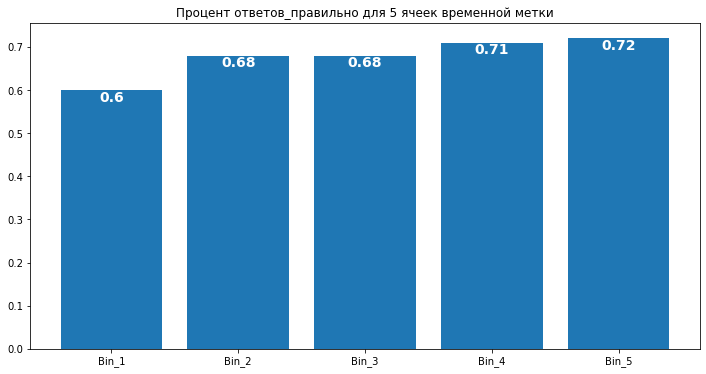

In [42]:
import matplotlib.pyplot as plt
import numpy as np

bin_labels_5 = ['Bin_1', 'Bin_2', 'Bin_3', 'Bin_4', 'Bin_5']
train_data['ts_bin'] = pd.qcut(train_data['timestamp'], q=5, labels=bin_labels_5)

#сделаем функцию, которую также можно использовать для других полей
def correct(field):
    correct = train_data[train_data.answered_correctly != -1].groupby([field, 'answered_correctly'], as_index=False).size()
    correct = correct.pivot(index= field, columns='answered_correctly', values='size')
    correct['Percent_correct'] = round(correct.iloc[:,1]/(correct.iloc[:,0] + correct.iloc[:,1]),2)
    correct = correct.sort_values(by = "Percent_correct", ascending = False)
    correct = correct.iloc[:,2]
    return(correct)

bins_correct = correct("ts_bin")
bins_correct = bins_correct.sort_index()

fig = plt.figure(figsize=(12,6))
plt.bar(bins_correct.index, bins_correct.values)
for i, v in zip(bins_correct.index, bins_correct.values):
    plt.text(i, v, v, color='white', fontweight='bold', fontsize=14, va='top', ha='center')
plt.title("Процент ответов_правильно для 5 ячеек временной метки")
plt.xticks(rotation=0)
plt.show()

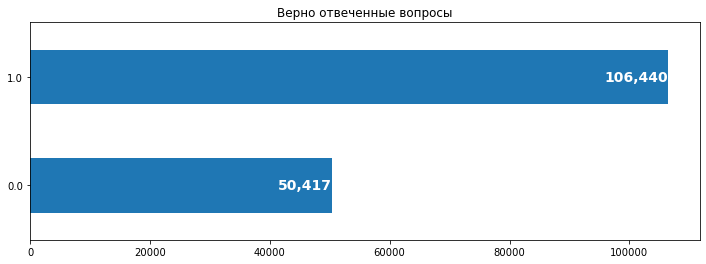

In [41]:


correct = train_data[train_data.answered_correctly != -1].answered_correctly.value_counts(ascending=True)

fig = plt.figure(figsize=(12,4))
correct.plot.barh()
for i, v in zip(correct.index, correct.values):
    plt.text(v, i, '{:,}'.format(v), color='white', fontweight='bold', fontsize=14, ha='right', va='center')
plt.title("Верно отвеченные вопросы")
plt.xticks(rotation=0)
plt.show()



In [ ]:
#Я выяснила, есть ли связь между временной меткой и answer_correctly. Чтобы узнать, я сделала 5 ячеек временной метки. 
#Выяснилось, что пользователи, которые зарегистрировались относительно недавно, работают немного хуже, 
#чем пользователи, которые активны дольше.

In [45]:
user_percent = train_data[train_data.answered_correctly != -1].groupby('user_id')['answered_correctly'].agg(Mean='mean', Answers='count')
print(f'Наибольшее количество вопросов, на которые ответил пользователь - {user_percent.Answers.max()}')

Наибольшее количество вопросов, на которые ответил пользователь - 7476


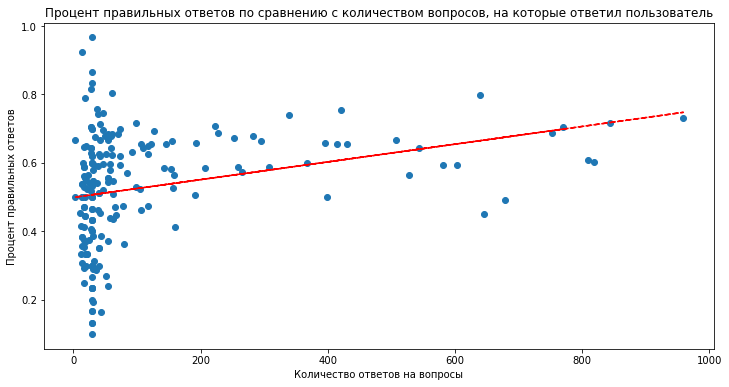

In [47]:
user_percent = user_percent.query('Answers <= 1000').sample(n=200, random_state=1)

fig = plt.figure(figsize=(12,6))
x = user_percent.Answers
y = user_percent.Mean
plt.scatter(x, y, marker='o')
plt.title("Процент правильных ответов по сравнению с количеством вопросов, на которые ответил пользователь")
plt.xticks(rotation=0)
plt.xlabel("Количество ответов на вопросы")
plt.ylabel("Процент правильных ответов")
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.show()

In [50]:
print('Часть пропущенных значений для каждого столбца')
print(train_data.isnull().sum() / len(train_data))

Часть пропущенных значений для каждого столбца
row_id                            0.000000
timestamp                         0.000000
user_id                           0.000000
content_id                        0.000000
content_type_id                   0.000000
task_container_id                 0.000006
user_answer                       0.000006
answered_correctly                0.000006
prior_question_elapsed_time       0.022511
prior_question_had_explanation    0.003622
ts_bin                            0.000000
dtype: float64


prior_question_had_explanation
False     12793
True     143486
<NA>        578
Name: (answered_correctly, count), dtype: int64


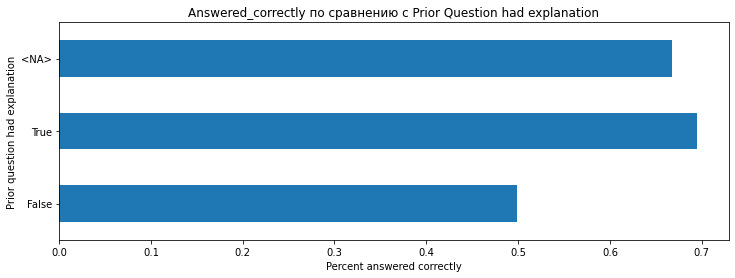

In [55]:
pq = train_data[train_data.answered_correctly != -1].groupby(['prior_question_had_explanation'], dropna=False).agg({'answered_correctly': ['mean', 'count']})
#pq.index = pq.index.astype(str)
print(pq.iloc[:,1])
pq = pq.iloc[:,0]

fig = plt.figure(figsize=(12,4))
pq.plot.barh()
# for i, v in zip(pq.index, pq.values):
#     plt.text(v, i, round(v,2), color='white', fontweight='bold', fontsize=14, ha='right', va='center')
plt.title("Answered_correctly по сравнению с Prior Question had explanation")
plt.xlabel("Percent answered correctly")
plt.ylabel("Prior question had explanation")
plt.xticks(rotation=0)
plt.show()


In [56]:
#Интересно, что процент правильных ответов для пропущенных значений ближе к True, чем к False.

In [57]:
pq = train_data[train_data.answered_correctly != -1]
pq = pq[['prior_question_elapsed_time', 'answered_correctly']]
pq = pq.groupby(['answered_correctly']).agg({'answered_correctly': ['count'], 'prior_question_elapsed_time': ['mean']})

pq

,answered_correctly,prior_question_elapsed_time
,count,mean
answered_correctly,,
0.0,50417,24985.142439
1.0,106440,25007.076386


In [ ]:
#Оказалось не очень интересным в отношении нашей цели. Как для неправильных, так и для правильных ответов среднее значение 
#составляет около 25 секунд.

# Перейдем к questions dataset

In [85]:
questions_data.head()

,question_id,bundle_id,correct_answer,part,tags,Wrong,Right
0,0,0,0,1,"['51', '131', '162', '38']",0.0,13.0
1,1,1,1,1,"['131', '36', '81']",1.0,5.0
2,2,2,0,1,"['131', '101', '162', '92']",29.0,53.0
3,3,3,0,1,"['131', '149', '162', '29']",6.0,28.0
4,4,4,3,1,"['131', '5', '162', '38']",19.0,34.0


In [87]:
questions_data.shape


(13523, 7)

In [90]:
#Таким образом, в наших данных содержится информация о 13 523 вопросах, и их описывают 7 признаков (мы уже добавили Wrong и Right).

In [89]:
questions_data['tags'] = questions_data['tags'].astype(str)

tags = [x.split() for x in questions_data[questions_data.tags != "nan"].tags.values]
tags = [item for elem in tags for item in elem]
tags = set(tags)
tags = list(tags)
print(f'Существуют {len(tags)} различных тэгов')

Существуют 266 различных тэгов


In [92]:
questions_data.tags.values

array(["['51', '131', '162', '38']", "['131', '36', '81']",
       "['131', '101', '162', '92']", ..., "['73']", "['125']", "['55']"],
      dtype=object)

In [104]:
#Секция аудирования состоит из частей 1-4 (Секция аудирования (около 45 минут, 100 вопросов)).
#Раздел чтения состоит из частей 5-7 (раздел чтения (75 минут, 100 вопросов)).

#Посмотрим количество и процент правильности по секциям.

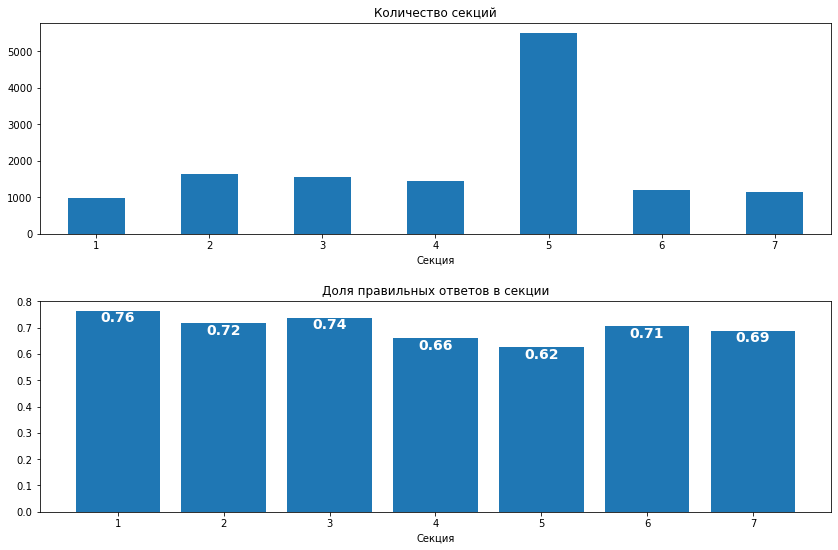

In [103]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
ax1 = questions_data.groupby("part").count()['question_id'].plot.bar()
plt.title("Количество секций")
plt.xlabel("Секция")
plt.xticks(rotation=0)

part = questions_data.groupby('part').agg({'Wrong': ['sum'], 'Right': ['sum']})
part['Percent_correct'] = part.Right/(part.Right + part.Wrong)
part = part.iloc[:,2]

ax2 = fig.add_subplot(212)
plt.bar(part.index, part.values)
for i, v in zip(part.index, part.values):
    plt.text(i, v, round(v,2), color='white', fontweight='bold', fontsize=14, va='top', ha='center')

plt.title("Доля правильных ответов в секции")
plt.xlabel("Секция")
plt.xticks(rotation=0)
plt.tight_layout(pad=2)
plt.show()

In [106]:
# Вывод: в части 5 гораздо больше id_вопросов, и она также является самой сложной.

# Перейдем к lecture dataset

In [107]:
lectures_data.head()

,lecture_id,tag,part,type_of
0,89,159,5,concept
1,100,70,1,concept
2,185,45,6,concept
3,192,79,5,solving question
4,317,156,5,solving question


In [111]:
print(f'Существуют {lectures_data.shape[0]} идентификаторов лекций.')

Существуют 418 идентификаторов лекций.


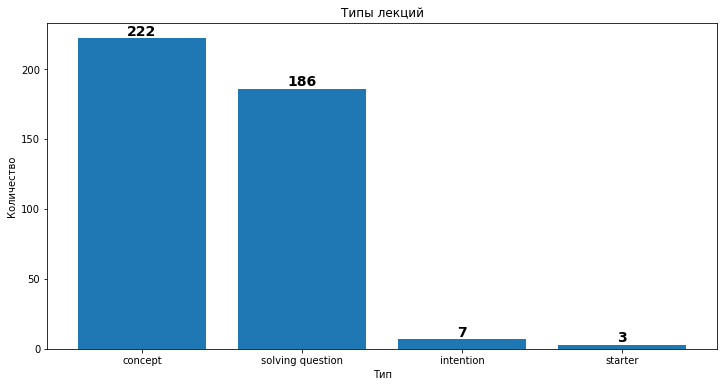

In [113]:
lect_type_of = lectures_data.type_of.value_counts()

fig = plt.figure(figsize=(12,6))
plt.bar(lect_type_of.index, lect_type_of.values)
for i, v in zip(lect_type_of.index, lect_type_of.values):
    plt.text(i, v, v, color='black', fontweight='bold', fontsize=14, va='bottom', ha='center')
plt.title("Типы лекций")
plt.xlabel("Тип")
plt.ylabel("Количество")
plt.xticks(rotation=0)
plt.show()

False    345
True     234
Name: Watches_lecture, dtype: int64


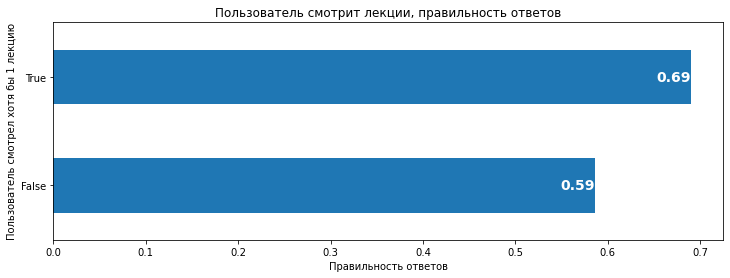

In [115]:
user_lect = train_data.groupby(["user_id", "answered_correctly"]).size().unstack()
user_lect.columns = ['Lecture', 'Wrong', 'Right']
user_lect['Lecture'] = user_lect['Lecture'].fillna(0)
user_lect = user_lect.astype('Int64')
user_lect['Watches_lecture'] = np.where(user_lect.Lecture > 0, True, False)

watches_l = user_lect.groupby("Watches_lecture").agg({'Wrong': ['sum'], 'Right': ['sum']})
print(user_lect.Watches_lecture.value_counts())

watches_l['Percent_correct'] = watches_l.Right/(watches_l.Right + watches_l.Wrong)

watches_l = watches_l.iloc[:,2]

fig = plt.figure(figsize=(12,4))
watches_l.plot.barh()
for i, v in zip(watches_l.index, watches_l.values):
    plt.text(v, i, round(v,2), color='white', fontweight='bold', fontsize=14, ha='right', va='center')

plt.title("Пользователь смотрит лекции, правильность ответов")
plt.xlabel("Правильность ответов")
plt.ylabel("Пользователь смотрел хотя бы 1 лекцию")
plt.xticks(rotation=0)
plt.show()

In [117]:
batch_lect = train_data.groupby(["task_container_id", "answered_correctly"]).size().unstack()
batch_lect.columns = ['Lecture', 'Wrong', 'Right']
batch_lect['Lecture'] = batch_lect['Lecture'].fillna(0)
batch_lect = batch_lect.astype('Int64')
batch_lect['Percent_correct'] = batch_lect.Right/(batch_lect.Wrong + batch_lect.Right)
batch_lect['Percent_lecture'] = batch_lect.Lecture/(batch_lect.Lecture + batch_lect.Wrong + batch_lect.Right)
batch_lect = batch_lect.sort_values(by = "Percent_lecture", ascending = False)

print(f'Наибольшее количество лекций, просмотренных в пределах одного task_container_id, равно {batch_lect.Lecture.max()}.')

Наибольшее количество лекций, просмотренных в пределах одного task_container_id, равно 12.


In [118]:
batch_lect.head()

,Lecture,Wrong,Right,Percent_correct,Percent_lecture
task_container_id,,,,,
4224.0,1,1,1,0.5,0.333333
3334.0,1,1,1,0.5,0.333333
4661.0,1,1,1,0.5,0.333333
3837.0,1,1,1,0.5,0.333333
3525.0,1,1,1,0.5,0.333333


In [122]:
batch_lect['Has_lecture'] = np.where(batch_lect.Lecture == 0, False, True)
print(f'У нас есть {batch_lect[batch_lect.Has_lecture == True].shape[0]} task_container_ids c лекциями и {batch_lect[batch_lect.Has_lecture == False].shape[0]} task_container_ids без лекций.')

У нас есть 1514 task_container_ids c лекциями и 4117 task_container_ids без лекций.


In [123]:
batch_lect = batch_lect[['Wrong', 'Right', 'Has_lecture']]
batch_lect = batch_lect.groupby("Has_lecture").sum()
batch_lect['Percent_correct'] = batch_lect.Right/(batch_lect.Wrong + batch_lect.Right)
batch_lect = batch_lect[['Percent_correct']]
batch_lect

,Percent_correct
Has_lecture,
False,0.691915
True,0.672026
